In [32]:
# Import Python Libraries

In [33]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve # Importing necessary functions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading:


In [34]:
# Load training and testing datasets
train_data_EV = pd.read_csv('/content/drive/MyDrive/Test.csv')
test_data_EV = pd.read_csv('/content/drive/MyDrive/Train.csv')

# Inspect the data
display(train_data_EV)

,Trip,VehicleSpeed_km_h_,Battery_Status
0,1558,53.590000,0
1,1558,51.980000,0
2,1558,50.369999,0
3,1558,50.369999,1
4,1558,49.799999,1
...,...,...,...
60167,3271,31.719999,1
60168,3271,33.840000,1
60169,3271,33.840000,0
60170,3271,40.040001,0


# Get Statistical wrap up

In [35]:
train_data_EV.describe()

,Trip,VehicleSpeed_km_h_,Battery_Status
count,60172.000000,60172.000000,60172.000000
mean,2449.359320,34.255137,0.257346
std,447.700622,22.876331,0.437175
min,1558.000000,0.000000,0.000000
25%,2105.000000,13.960000,0.000000
50%,2533.000000,36.369999,0.000000
75%,2806.000000,53.590000,1.000000
max,3271.000000,84.650002,1.000000


# Separating our Feature and Target

In [36]:
X_train = train_data_EV[['VehicleSpeed_km_h_']]
y_train = train_data_EV['Battery_Status']

X_test = test_data_EV[['VehicleSpeed_km_h_']]
y_test = test_data_EV['Battery_Status']

# Understand Class

In [37]:
class_counts = train_data_EV['Battery_Status'].value_counts()
print(class_counts)

Battery_Status
0    44687
1    15485
Name: count, dtype: int64


We Have Imbalanced classes we have 0:78773, 1:28312 this will affect our model predictions

Plot Class Imbalance for better Visualization

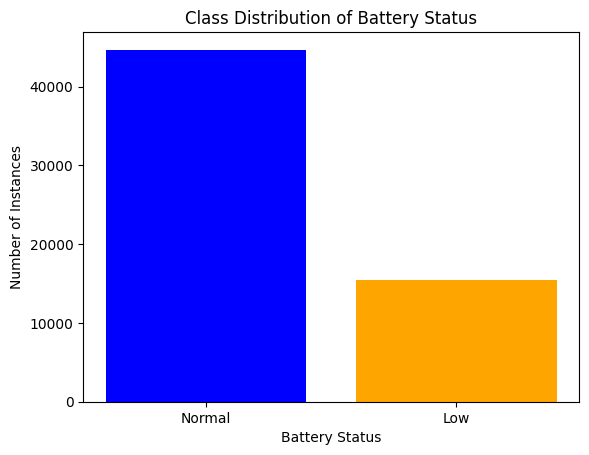

In [38]:
# Plot class distribution
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Battery Status')
plt.ylabel('Number of Instances')
plt.title('Class Distribution of Battery Status')
plt.xticks([0, 1], ['Normal', 'Low'])
plt.show()

# Try to Balance the Data

In [39]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#We Train the model

In [40]:
# Train KNN model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model_knn.predict(X_test)

# Evaluate the Model Using Metrics

In [41]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6421721062707195
Confusion Matrix:
[[59301 19472]
 [18846  9466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     78773
           1       0.33      0.33      0.33     28312

    accuracy                           0.64    107085
   macro avg       0.54      0.54      0.54    107085
weighted avg       0.64      0.64      0.64    107085



Area Under the Curve (AUC): 0.5678


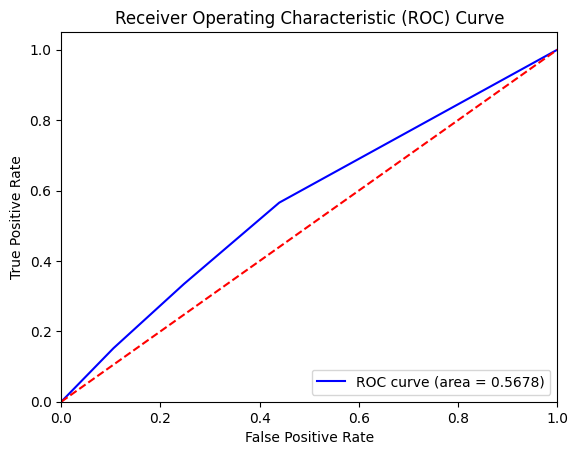

In [42]:
# for class 1 probabilities
y_prob = model_knn.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
print(f"Area Under the Curve (AUC): {auc:.4f}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Plot Prediction

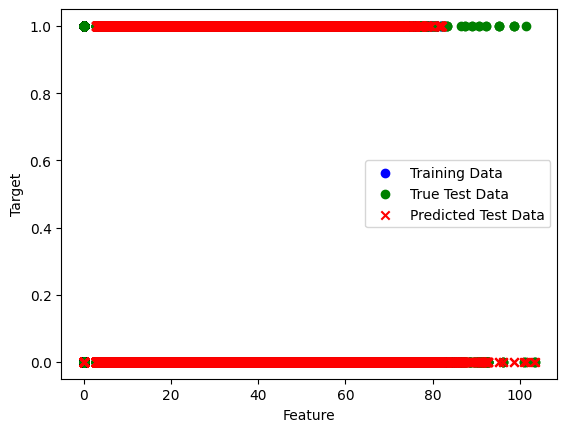

In [43]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='True Test Data')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Test Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()